In [ ]:
# Lab Assignment 1 — Analyzing and Visualizing Recursive Algorithm Efficiency
# Course: ENCA351  
# Student: Priyanshu Dubey  
# Date: 27 August 2025

# Goal: Implement algorithms, measure runtime & memory, plot and analyze results.

In [11]:
# Cell 2: Setup & Imports
import sys, platform, os, time, statistics, random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
# If running in Jupyter, enable magic (optional)
# %load_ext memory_profiler

# Reproducibility
random.seed(0)
np.random.seed(0)
os.makedirs("images", exist_ok=True)

print("Python:", sys.version.splitlines()[0])
print("Platform:", platform.platform())
print("NumPy:", np.__version__)
print("Matplotlib:", matplotlib.__version__)


Python: 3.12.2 (v3.12.2:6abddd9f6a, Feb  6 2024, 17:02:06) [Clang 13.0.0 (clang-1300.0.29.30)]
Platform: macOS-15.5-arm64-arm-64bit
NumPy: 2.3.2
Matplotlib: 3.10.5


In [4]:
# Cell 3: Profiling helpers

def time_fn(func, *args, trials=3, **kwargs):
    """Return average time (sec) of func over 'trials' runs."""
    times = []
    for _ in range(trials):
        t0 = time.perf_counter()
        func(*args, **kwargs)
        t1 = time.perf_counter()
        times.append(t1 - t0)
    return statistics.mean(times)

def mem_fn(func, *args, interval=0.1, timeout=None, **kwargs):
    """
    Measure memory usage (MiB) during a single call of func.
    Returns peak memory usage minus baseline approximate value.
    """
    mem_samples = memory_usage((func, args, kwargs), interval=interval, timeout=timeout)
    return max(mem_samples) - min(mem_samples) if mem_samples else 0.0

def time_and_mem(func, *args, trials=3, mem_interval=0.1, **kwargs):
    """Return (avg_time_sec, mem_peak_MiB)"""
    t = time_fn(func, *args, trials=trials, **kwargs)
    m = mem_fn(func, *args, interval=mem_interval, **kwargs)
    return t, m

In [6]:
# Cell 4: Algorithm implementations

# 1) Fibonacci - Naive recursive
def fib_naive(n):
    """Naive recursive Fibonacci. Exponential time O(2^n)."""
    if n <= 1:
        return n
    return fib_naive(n-1) + fib_naive(n-2)

# 1b) Fibonacci - DP memoization
def fib_dp(n, memo=None):
    """DP memoization Fibonacci. Linear time O(n)."""
    if memo is None:
        memo = {}
    if n in memo:
        return memo[n]
    if n <= 1:
        res = n
    else:
        res = fib_dp(n-1, memo) + fib_dp(n-2, memo)
    memo[n] = res
    return res

# 2) Merge Sort
def merge_sort(arr):
    """Return a new sorted list using merge sort (not in-place)."""
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    i = j = 0
    merged = []
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            merged.append(left[i]); i += 1
        else:
            merged.append(right[j]); j += 1
    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged

# 3) Quick Sort (simple non in-place)
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    eq = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + eq + quick_sort(right)

# 4) Insertion Sort
def insertion_sort(arr):
    a = arr.copy()
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and a[j] > key:
            a[j+1] = a[j]
            j -= 1
        a[j+1] = key
    return a

# 5) Bubble Sort
def bubble_sort(arr):
    a = arr.copy()
    n = len(a)
    for i in range(n):
        swapped = False
        for j in range(0, n - i - 1):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]
                swapped = True
        if not swapped:
            break
    return a

# 6) Selection Sort
def selection_sort(arr):
    a = arr.copy()
    n = len(a)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if a[j] < a[min_idx]:
                min_idx = j
        a[i], a[min_idx] = a[min_idx], a[i]
    return a

# 7) Binary Search
def binary_search(arr, target):
    low, high = 0, len(arr)-1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return -1

print("Algorithm functions defined.")

Algorithm functions defined.


In [7]:
# Cell 5: Quick correctness tests

# Sorting tests
sample = [5,2,9,1,5,6]
assert merge_sort(sample) == sorted(sample)
assert quick_sort(sample) == sorted(sample)
assert insertion_sort(sample) == sorted(sample)
assert bubble_sort(sample) == sorted(sample)
assert selection_sort(sample) == sorted(sample)

# Binary search test
arr = sorted(np.random.randint(0,1000,100).tolist())
target = arr[50]
idx = binary_search(arr, target)
assert idx != -1 and arr[idx] == target

# Fibonacci small tests
assert fib_naive(0) == 0
assert fib_naive(1) == 1
assert fib_dp(10) == 55

print("All correctness tests passed.")

All correctness tests passed.


In [8]:
# Cell 6: Sorting experiments
sorting_algorithms = {
    "Insertion Sort": insertion_sort,
    "Selection Sort": selection_sort,
    "Bubble Sort": bubble_sort,
    "Merge Sort": merge_sort,
    "Quick Sort": quick_sort
}

input_sizes_sort = [100, 500, 1000, 2000, 3000, 5000]
time_results_sort = {name: [] for name in sorting_algorithms}
mem_results_sort = {name: [] for name in sorting_algorithms}

for n in input_sizes_sort:
    base_arr = np.random.randint(0, 10000, n).tolist()
    print(f"Sorting: n={n}")
    for name, func in sorting_algorithms.items():
        # measure time (average of 3 runs) and memory (single run)
        t = time_fn(func, base_arr, trials=3)
        m = mem_fn(func, base_arr, interval=0.1, timeout=30)
        time_results_sort[name].append(t)
        mem_results_sort[name].append(m)
        print(f"  {name}: time {t:.4f}s, mem {m:.2f} MiB")

Sorting: n=100
  Insertion Sort: time 0.0002s, mem 0.00 MiB
  Insertion Sort: time 0.0002s, mem 0.00 MiB
  Selection Sort: time 0.0002s, mem 0.00 MiB
  Selection Sort: time 0.0002s, mem 0.00 MiB
  Bubble Sort: time 0.0003s, mem 0.00 MiB
  Bubble Sort: time 0.0003s, mem 0.00 MiB
  Merge Sort: time 0.0001s, mem 0.00 MiB
  Merge Sort: time 0.0001s, mem 0.00 MiB
  Quick Sort: time 0.0001s, mem 0.00 MiB
Sorting: n=500
  Quick Sort: time 0.0001s, mem 0.00 MiB
Sorting: n=500
  Insertion Sort: time 0.0037s, mem 0.00 MiB
  Insertion Sort: time 0.0037s, mem 0.00 MiB
  Selection Sort: time 0.0045s, mem 0.00 MiB
  Selection Sort: time 0.0045s, mem 0.00 MiB
  Bubble Sort: time 0.0088s, mem 0.00 MiB
  Bubble Sort: time 0.0088s, mem 0.00 MiB
  Merge Sort: time 0.0008s, mem 0.00 MiB
  Merge Sort: time 0.0008s, mem 0.00 MiB
  Quick Sort: time 0.0006s, mem 0.00 MiB
Sorting: n=1000
  Quick Sort: time 0.0006s, mem 0.00 MiB
Sorting: n=1000
  Insertion Sort: time 0.0186s, mem 0.00 MiB
  Insertion Sort: time

In [9]:
# Cell 7: Fibonacci experiments
fib_algorithms = {
    "Naive Recursive": fib_naive,
    "Dynamic Programming": lambda n: fib_dp(n, memo={})
}
# safe ranges
input_sizes_fib_naive = list(range(1, 26))        # naive up to 25
input_sizes_fib_dp = list(range(1, 36))           # dp up to 35

time_results_fib = {"Naive Recursive": [], "Dynamic Programming": []}
mem_results_fib = {"Naive Recursive": [], "Dynamic Programming": []}

# naive
for n in input_sizes_fib_naive:
    t = time_fn(fib_naive, n, trials=1)  # naive: single trial
    m = mem_fn(fib_naive, n, interval=0.01, timeout=30)
    time_results_fib["Naive Recursive"].append(t)
    mem_results_fib["Naive Recursive"].append(m)
    print(f"Naive fib n={n}: time {t:.4f}s, mem {m:.2f} MiB")

# dp
for n in input_sizes_fib_dp:
    t = time_fn(fib_dp, n, trials=3)
    m = mem_fn(fib_dp, n, interval=0.01, timeout=30)
    time_results_fib["Dynamic Programming"].append(t)
    mem_results_fib["Dynamic Programming"].append(m)
    print(f"DP fib n={n}: time {t:.6f}s, mem {m:.2f} MiB")

Naive fib n=1: time 0.0000s, mem 0.00 MiB
Naive fib n=2: time 0.0000s, mem 0.00 MiB
Naive fib n=2: time 0.0000s, mem 0.00 MiB
Naive fib n=3: time 0.0000s, mem 0.09 MiB
Naive fib n=3: time 0.0000s, mem 0.09 MiB
Naive fib n=4: time 0.0000s, mem 0.31 MiB
Naive fib n=4: time 0.0000s, mem 0.31 MiB
Naive fib n=5: time 0.0000s, mem 0.00 MiB
Naive fib n=5: time 0.0000s, mem 0.00 MiB
Naive fib n=6: time 0.0000s, mem 0.05 MiB
Naive fib n=6: time 0.0000s, mem 0.05 MiB
Naive fib n=7: time 0.0000s, mem 0.00 MiB
Naive fib n=7: time 0.0000s, mem 0.00 MiB
Naive fib n=8: time 0.0000s, mem 0.00 MiB
Naive fib n=8: time 0.0000s, mem 0.00 MiB
Naive fib n=9: time 0.0000s, mem 0.00 MiB
Naive fib n=9: time 0.0000s, mem 0.00 MiB
Naive fib n=10: time 0.0000s, mem 0.00 MiB
Naive fib n=10: time 0.0000s, mem 0.00 MiB
Naive fib n=11: time 0.0000s, mem 0.00 MiB
Naive fib n=11: time 0.0000s, mem 0.00 MiB
Naive fib n=12: time 0.0000s, mem 0.00 MiB
Naive fib n=12: time 0.0000s, mem 0.00 MiB
Naive fib n=13: time 0.0000s

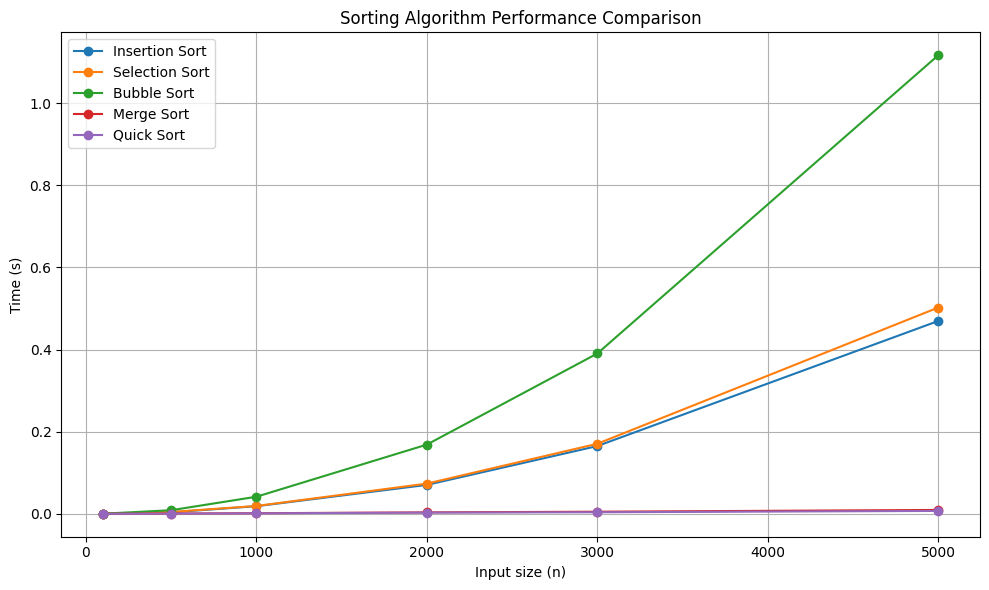

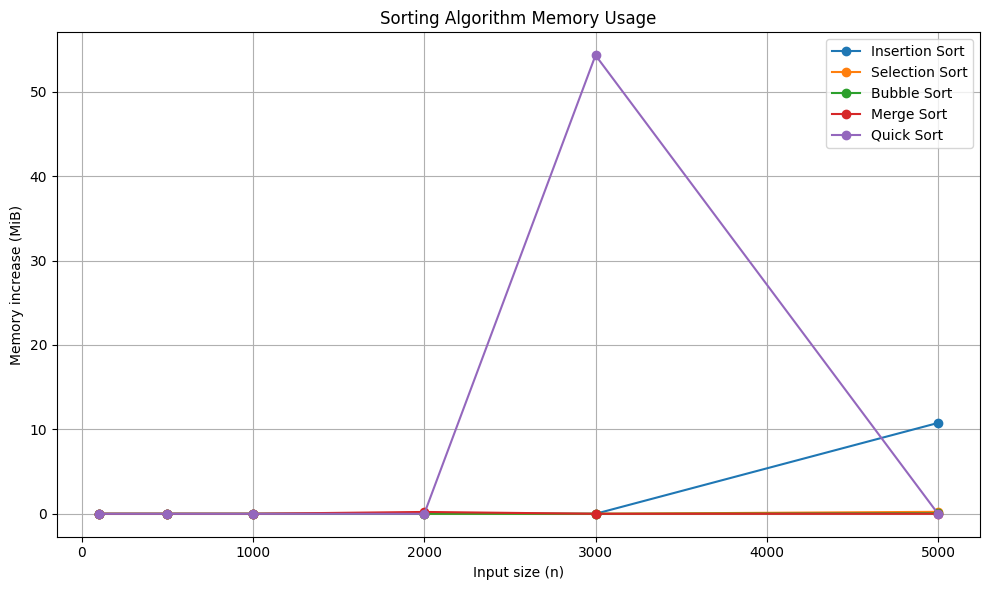

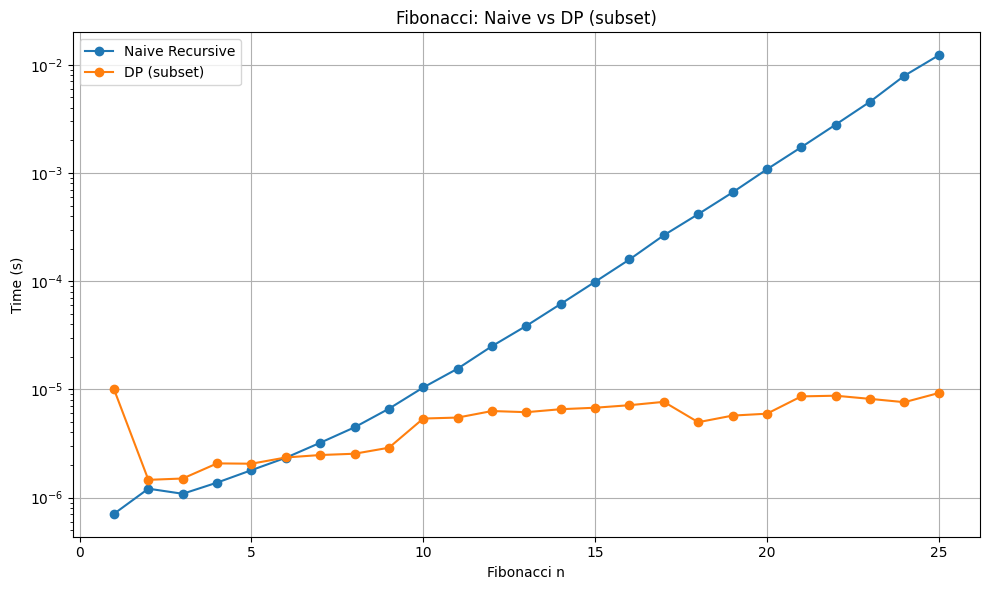

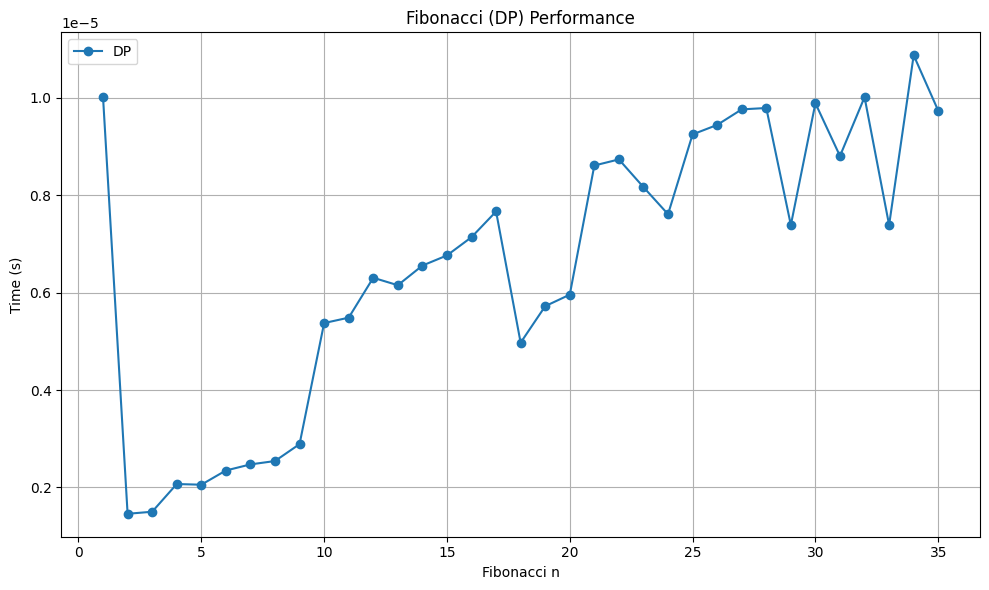

In [10]:
# Cell 8: Plotting sorting results
plt.figure(figsize=(10,6))
for name, times in time_results_sort.items():
    plt.plot(input_sizes_sort, times, marker='o', label=name)
plt.xlabel("Input size (n)")
plt.ylabel("Time (s)")
plt.title("Sorting Algorithm Performance Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("images/sorting_comparison.png", dpi=200)
plt.show()

# Memory plot for sorts
plt.figure(figsize=(10,6))
for name, mems in mem_results_sort.items():
    plt.plot(input_sizes_sort, mems, marker='o', label=name)
plt.xlabel("Input size (n)")
plt.ylabel("Memory increase (MiB)")
plt.title("Sorting Algorithm Memory Usage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("images/sorting_memory.png", dpi=200)
plt.show()

# Fibonacci time plot (log y for large gap)
plt.figure(figsize=(10,6))
plt.plot(input_sizes_fib_naive, time_results_fib["Naive Recursive"], marker='o', label="Naive Recursive")
plt.plot(input_sizes_fib_dp[:len(input_sizes_fib_naive)], time_results_fib["Dynamic Programming"][0:len(input_sizes_fib_naive)], marker='o', label="DP (subset)")
plt.xlabel("Fibonacci n")
plt.ylabel("Time (s)")
plt.title("Fibonacci: Naive vs DP (subset)")
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("images/fibonacci_comparison_subset.png", dpi=200)
plt.show()

# Fibonacci DP full plot
plt.figure(figsize=(10,6))
plt.plot(input_sizes_fib_dp, time_results_fib["Dynamic Programming"], marker='o', label="DP")
plt.xlabel("Fibonacci n")
plt.ylabel("Time (s)")
plt.title("Fibonacci (DP) Performance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("images/fibonacci_dp.png", dpi=200)
plt.show()

# Save final numeric results to CSV
import csv
with open("images/summary_sort_times.csv", "w", newline="") as f:
    writer = csv.writer(f)
    header = ["n"] + list(time_results_sort.keys())
    writer.writerow(header)
    for i, n in enumerate(input_sizes_sort):
        row = [n] + [time_results_sort[name][i] for name in time_results_sort]
        writer.writerow(row)

# Summary & Discussion

| Algorithm | Time Complexity (avg) | Space Complexity | Notes |
|---|---:|---:|---|
| Bubble Sort | O(n^2) | O(1) | Simple, bad for large n |
| Insertion Sort | O(n^2) | O(1) | Adaptive for nearly-sorted data |
| Selection Sort | O(n^2) | O(1) | Minimal swaps |
| Merge Sort | O(n log n) | O(n) | Stable, predictable |
| Quick Sort | O(n log n) avg | O(log n) avg | Fast in practice, worst O(n^2) |
| Fibonacci (Naive) | O(2^n) | O(n) recursion | Exponential growth |
| Fibonacci (DP) | O(n) | O(n) | Efficient with memoization |

**Observed vs Expected:**  
- Fibonacci naive blows up fast — log scale plot shows exponential trend.  
- DP is linear and very fast.  
- Merge/Quick show ~n log n trend, insertion/bubble/selection show quadratic behaviour on runtime plot.

**Reproducibility:**  
Run `pip install -r requirements.txt`, select kernel `Python (algo-venv)`, run all cells.